# Advanced Classifiers

In [47]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
from itertools import cycle
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
# hyperparameter tuning ## To search for the most suitable parameters for the Decision Tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from yellowbrick import ROCAUC
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import confusion_matrix

In [2]:
X_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/2Modulo/X_train.txt", header=None,  delim_whitespace=True)
y_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/2Modulo/y_train.txt", header=None, delim_whitespace=True )
X_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/2Modulo/X_test.txt", header=None, delim_whitespace=True )
y_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/2Modulo/y_test.txt", header=None, delim_whitespace=True )
subject_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/2Modulo/subject_train.txt", header=None, delim_whitespace=True )
features = pd.read_csv("/Users/salvu/Desktop/DM2Git/2Modulo/features.txt", header=None, delim_whitespace=True )

In [3]:
feature = features
feature.drop(0,inplace=True, axis=1)

In [4]:
#inseriamo l'intestazione al dataset
lista=[]
feat_transpa = feature.transpose()
for i in range(561):
    lista.append(feat_transpa.iloc[0][i])
X_test.columns=lista    
X_train.columns=lista

In [5]:
# eliminiamo le colonne che contengono la stima mad in quanto quasi uguale a dev.std
stringa="mad()"
for col in X_train.columns:
    if(stringa in col):
        X_train.drop(labels=col, axis=1, inplace=True)
for col in X_test.columns:
    if(stringa in col):
        X_test.drop(labels=col, axis=1, inplace=True)
#for col in features:
#    if (stringa in col):
#        features.drop(labels=col,axis=1,inplace=True)

## NAIVE BAYES

In [7]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [8]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, np.ravel(y_train))
y_pred_nb = clf_nb.predict(X_test)
y_pred_proba_nb = clf_nb.predict_proba(X_test)

In [9]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_nb))
print('F1-score %s' % f1_score(y_test, y_pred_nb, average=None))
print(classification_report(y_test, y_pred_nb))

Accuracy 0.7835086528673227
F1-score [0.83266932 0.84752105 0.7032967  0.6710403  0.83005367 0.79295154]
              precision    recall  f1-score   support

           1       0.82      0.84      0.83       496
           2       0.76      0.96      0.85       471
           3       0.83      0.61      0.70       420
           4       0.62      0.73      0.67       491
           5       0.79      0.87      0.83       532
           6       0.97      0.67      0.79       537

    accuracy                           0.78      2947
   macro avg       0.80      0.78      0.78      2947
weighted avg       0.80      0.78      0.78      2947



In [10]:
#Binarize FARE ATTENZIONE PERCHE' DOPO SBALLA LE CLASSI
y_test1 = label_binarize(y_test, classes=[1,2,3,4,5,6])
y_train1 = label_binarize(y_train, classes=[1,2,3,4,5,6])

In [11]:
# Learn to predict each class against the other
classifier_nb = OneVsRestClassifier(GaussianNB())
classifier_nb.fit(X_train, y_train1)
y_pred_nb_nb = classifier_nb.predict(X_test)
y_pred_proba_nb = classifier_nb.predict_proba(X_test)

In [12]:
# Compute ROC curve and ROC area for each class
CLASS_LABELS = [ "WALKING" , "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(CLASS_LABELS)):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_pred_proba_nb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

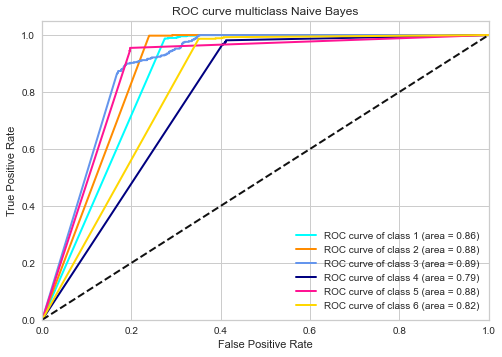

In [13]:
#plot
lw=2
colors = cycle(["aqua", "darkorange", "cornflowerblue","navy", "deeppink", "gold"])
for i, color in zip(range(len(CLASS_LABELS)), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve multiclass Naive Bayes")
plt.legend(loc="lower right")
plt.show()

## Linear Regression 2 dimensions


In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [15]:
train_A= X_train[['tBodyAcc-std()-X']].values # deicdere quale variabile indipendete
train_B= X_train[['tBodyAcc-max()-Y']].values # decidere quale variabile dipendete
test_A= X_test[['tBodyAcc-std()-X']].values
test_B= X_test[['tBodyAcc-max()-Y']].values

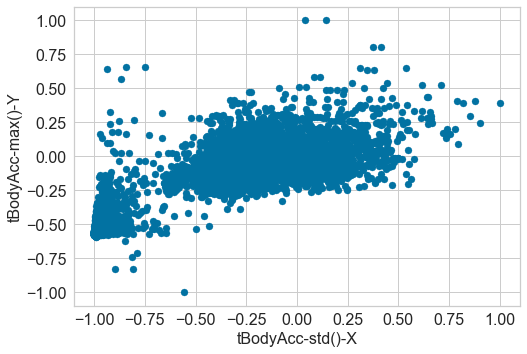

In [16]:
plt.scatter(train_A, train_B)
plt.xlabel('tBodyAcc-std()-X', fontsize=16)
plt.ylabel('tBodyAcc-max()-Y', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [17]:
reg = LinearRegression()
reg.fit(train_A, train_B)

LinearRegression()

In [18]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[0.56306957]]
Intercept: 
 [0.03486081]


In [19]:
y_pred_reg = reg.predict(test_A)

In [20]:
print('R2: %.3f' % r2_score(test_B, y_pred_reg))
print('MSE: %.3f' % mean_squared_error(test_B, y_pred_reg))
print('MAE: %.3f' % mean_absolute_error(test_B, y_pred_reg))

R2: 0.824
MSE: 0.013
MAE: 0.078


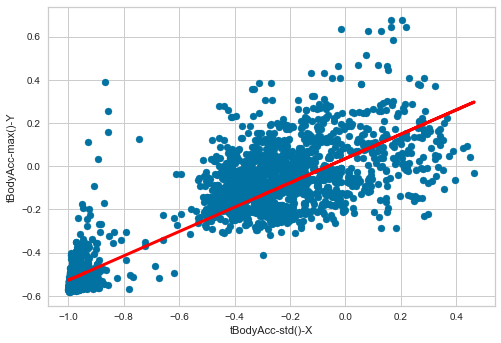

In [21]:
fig1, ax1 = plt.subplots()
ax1.scatter(test_A, test_B)
ax1.plot(test_A, y_pred_reg, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('tBodyAcc-std()-X')
ax1.set_ylabel('tBodyAcc-max()-Y')
plt.show()

## Lasso


In [22]:
from sklearn.linear_model import LassoLarsCV
reg_lasso = LassoLarsCV()
reg_lasso.fit(train_A, train_B)
print('Alpha: \n', reg_lasso.alpha_)
print('Coefficients: \n', reg_lasso.coef_)
print('Intercept: \n', reg_lasso.intercept_)

Alpha: 
 0.0
Coefficients: 
 [0.56306957]
Intercept: 
 0.03486080997267704


c:\anaconda3n\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
c:\anaconda3n\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
y_pred_lasso = reg_lasso.predict(test_A)
print('R2: %.3f' % r2_score(test_B, y_pred_lasso))
print('MSE: %.3f' % mean_squared_error(test_B, y_pred_lasso)) # Misclassification Square Error 
print('MAE: %.3f' % mean_absolute_error(test_B, y_pred_lasso)) #

R2: 0.824
MSE: 0.013
MAE: 0.078


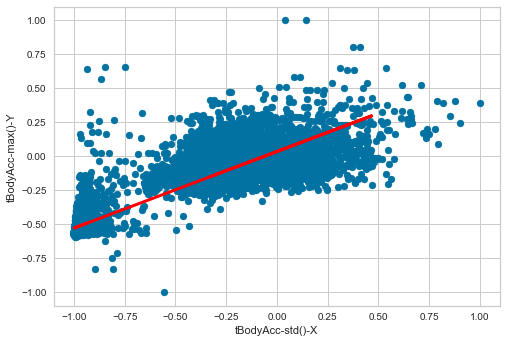

In [24]:
fig1, ax1 = plt.subplots()
ax1.scatter(train_A, train_B)
ax1.plot(test_A, y_pred_lasso, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('tBodyAcc-std()-X')
ax1.set_ylabel('tBodyAcc-max()-Y')
plt.show()

## Ridge

In [25]:
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNetCV
reg_rid = RidgeCV()
reg_rid.fit(train_A, train_B)
print('Alpha: \n', reg_lasso.alpha_)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Alpha: 
 0.0
Coefficients: 
 [[0.56306957]]
Intercept: 
 [0.03486081]


In [26]:
y_pred_rid = reg_rid.predict(test_A)
print('R2: %.3f' % r2_score(test_B, y_pred_rid))
print('MSE: %.3f' % mean_squared_error(test_B, y_pred_rid))
print('MAE: %.3f' % mean_absolute_error(test_B, y_pred_rid))

R2: 0.824
MSE: 0.013
MAE: 0.078


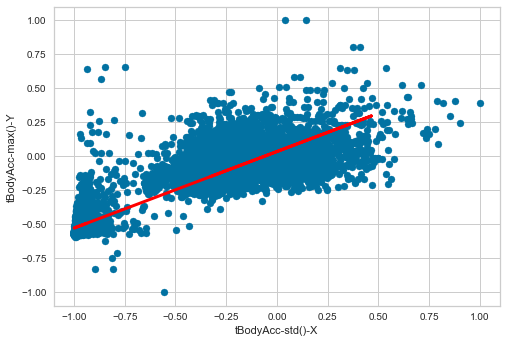

In [27]:
fig1, ax1 = plt.subplots()
ax1.scatter(train_A, train_B)
ax1.plot(test_A, y_pred_rid, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('tBodyAcc-std()-X')
ax1.set_ylabel('tBodyAcc-max()-Y')
plt.show()

## Regressione lineare multipla


In [28]:
attributes = [col for col in X_train.columns if col != 'tBodyAcc-max()-Y']

train_multiple_A= X_train[attributes].values      # tutte le altre variabili indipendenti
test_multiple_A= X_test[attributes].values 

train_multiple_B= X_train[['tBodyAcc-max()-Y']].values # decidere quale variabile dipendete
test_multiple_B= X_test[['tBodyAcc-max()-Y']].values

In [29]:
reg_multiple = LinearRegression()
reg_multiple.fit(train_multiple_A, train_multiple_B)

LinearRegression()

In [30]:
print('Coefficients: \n', reg_multiple.coef_)
print('Intercept: \n', reg_multiple.intercept_)

Coefficients: 
 [[ 1.38299989e-03  7.43209834e-01  8.92583307e-03  2.78375461e+00
   1.01819442e+00 -7.07244376e-02 -9.27808457e-03  1.34431982e-02
  -5.44099136e-02  4.32972728e-01 -3.60115985e-02 -4.12624116e-01
   2.69797455e+04  1.95313165e+04  9.46526240e+03 -3.53763380e-02
  -1.90235853e-01  4.84275498e-02  7.20474590e-03 -5.03479110e-02
   7.33617080e-03 -8.93821250e-03 -3.89236882e-02 -2.68094444e-02
  -2.88425637e-03  1.84339034e-02  3.54658943e-02 -4.90557290e-02
  -1.18822311e-02 -3.02217153e-02 -1.07294243e-01 -1.92230265e-02
   1.45116289e-02  1.45429944e-02 -8.74805438e-03  4.34927426e-03
  -2.07156695e-01  6.41508663e-01 -1.20480613e-01 -4.20397036e-01
  -5.29271471e-01 -1.19380594e-01  4.15275532e-01  3.27699562e-01
   1.46197595e-01 -2.43712832e-01 -9.37692315e-01 -6.81713630e-02
   2.11964556e-03 -6.64096163e-02 -9.53412315e-02 -8.13332859e-02
   2.40837434e-01  2.20255374e-01  5.05908880e-02  3.62880769e-03
   8.78008416e-03 -1.86804672e-03  1.06346722e+01  3.2436094

In [31]:
y_pred_multiple = reg_multiple.predict(test_multiple_A)

In [32]:
print('R2: %.6f' % r2_score(test_multiple_B, y_pred_multiple))
print('MSE: %.5f' % mean_squared_error(test_multiple_B, y_pred_multiple))
print('MAE: %.3f' % mean_absolute_error(test_multiple_B, y_pred_multiple))

R2: 0.935509
MSE: 0.00484
MAE: 0.044


## Lasso multiple

In [33]:
# Il Lasso ti butta a zero quelle variabili  che non sono necessarie per spiegare il modello, potresti eliminare la multicollinearità eliminando queste
from sklearn.linear_model import LassoCV

reg_lasso_multiple = LassoCV()
reg_lasso_multiple.fit(train_multiple_A, np.ravel(train_multiple_B))
print('Alpha: \n', reg_lasso_multiple.alpha_)
print('Coefficients: \n', reg_lasso_multiple.coef_)
print('Intercept: \n', reg_lasso_multiple.intercept_)

c:\anaconda3n\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04852158871103285, tolerance: 0.0459118373302195
  model = cd_fast.enet_coordinate_descent_gram(
c:\anaconda3n\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07162332926861126, tolerance: 0.0459118373302195
  model = cd_fast.enet_coordinate_descent_gram(
c:\anaconda3n\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06396525587875246, tolerance: 0.0459118373302195
  model = cd_fast.enet_coordinate_descent_gram(
c:\anaconda3n\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not

Alpha: 
 0.00019545664378942384
Coefficients: 
 [-0.00000000e+00  6.10801866e-01  0.00000000e+00 -0.00000000e+00
  4.61372439e-01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -3.73107771e-02  3.44321969e-01 -1.77379649e-02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.85495304e-02
 -8.80338004e-02  0.00000000e+00  0.00000000e+00 -3.02455283e-02
  6.74895030e-04  8.09638276e-04 -0.00000000e+00 -0.00000000e+00
  1.52256639e-03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  1.49696971e-02  1.89992607e-02 -1.82373858e-03 -0.00000000e+00
  0.00000000e+00  3.15751939e-02 -0.00000000e+00  0.00000000e+00
  5.48619301e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.50677317e-02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -3.79694417e-03  0.00000000e+00 -2.51452530e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.95345446e-03
  1.44052397e-02  0.00000000e+00  0.000000

c:\anaconda3n\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.006e-01, tolerance: 5.856e-02
  model = cd_fast.enet_coordinate_descent(


In [34]:
y_pred_lasso_multiple = reg_lasso_multiple.predict(test_multiple_A)
print('R2: %.6f' % r2_score(test_multiple_B, y_pred_lasso_multiple))
print('MSE: %.5f' % mean_squared_error(test_multiple_B, y_pred_lasso_multiple))
print('MAE: %.3f' % mean_absolute_error(test_multiple_B, y_pred_lasso_multiple))

R2: 0.933374
MSE: 0.00500
MAE: 0.045


## Ridge multiple


In [35]:
# Come il Lasso penalizza le variabili non utili, ma non le elimina completamente, non le butta proprio a zero ma le mette basse

reg_ridge_multiple = RidgeCV()
reg_ridge_multiple.fit(train_multiple_A, train_multiple_B)
print('Alpha: \n', reg_ridge_multiple.alpha_)
print('Coefficients: \n', reg_ridge_multiple.coef_)
print('Intercept: \n', reg_ridge_multiple.intercept_)

Alpha: 
 1.0
Coefficients: 
 [[ 3.02145761e-02  6.28406225e-01  8.99943495e-03  5.19289761e-03
   2.85982815e-01  2.96797925e-02 -7.64652682e-03  1.12904798e-02
  -7.52782124e-02  4.32515040e-01 -4.86672622e-02 -1.30020827e-01
   1.13686455e-02 -1.74343908e-02  8.15568406e-04 -4.67661317e-02
  -1.94351555e-01  2.94959507e-02  1.99287863e-03 -4.00264863e-02
   8.62951291e-03  3.11948863e-03 -1.56202254e-02 -1.84010354e-02
  -3.42044687e-03  4.75847377e-03  2.16155045e-02 -2.89074265e-02
   8.91351370e-03 -2.60607411e-03 -3.77881808e-02 -9.96835401e-03
   1.03397754e-02  1.69912048e-02 -8.48786730e-03  6.52829025e-03
  -9.19679301e-02  1.47204784e-01 -3.82688401e-04 -2.10199722e-02
   5.67265786e-02 -4.73604930e-02  8.14448300e-03 -3.75866101e-02
  -3.16594582e-02  2.86924027e-02 -1.18998218e-01 -1.92220113e-03
   7.49251879e-03 -4.82154700e-02 -7.15852120e-02 -4.52091877e-02
   6.42434624e-02 -1.53064351e-02  5.90525279e-03  2.94637397e-03
   1.16481872e-02 -1.31669394e-03 -6.36800338e-

In [36]:
y_pred_ridge_multiple = reg_ridge_multiple.predict(test_multiple_A)
print('R2: %.6f' % r2_score(test_multiple_B, y_pred_ridge_multiple))
print('MSE: %.5f' % mean_squared_error(test_multiple_B, y_pred_ridge_multiple))
print('MAE: %.3f' % mean_absolute_error(test_multiple_B, y_pred_ridge_multiple))

R2: 0.935052
MSE: 0.00488
MAE: 0.044


## Logistic Regression

In [37]:
# classificazione di tipo binaria, da una risposta del tipo 0 o 1
# crea una classe 0 e 1, la variabile che ci butti dentro deve essere binaria
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_train = pd.read_csv("y_train.txt", header=None, delim_whitespace=True )

In [38]:
y_train_binary=[]
for i in range(0, len(y_train[0])):
    if y_train[0][i]==1:
        y_train_binary.append(1)
    elif y_train[0][i]==2:
        y_train_binary.append(1)
    elif y_train[0][i]==3:
        y_train_binary.append(1)
    else:
        y_train_binary.append(0)

y_test_binary=[]
for i in range(0, len(y_test[0])):
    if y_test[0][i]==1:
        y_test_binary.append(1)
    elif y_test[0][i]==2:
        y_test_binary.append(1)
    elif y_test[0][i]==3:
        y_test_binary.append(1)
    else:
        y_test_binary.append(0)

In [39]:
selected_columns='tBodyAcc-std()-X'

valori_train=X_train[selected_columns].values
valori_test=X_test[selected_columns].values

#valori_train=X_train.values
#valori_test=X_test.values


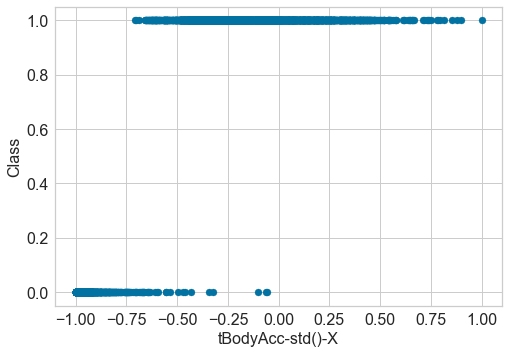

In [40]:
plt.scatter(valori_train, y_train_binary)
plt.xlabel(selected_columns, fontsize=16)
plt.ylabel('Class', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [41]:
clf_log = LogisticRegression(C=1000.0 , random_state=100, solver='liblinear')
# il parametro C è l'inverso della regolarizzazione. E' un fattore di penalizzazione nella missclassification, più grande è + grande sarà il peso della missclassification
#Pertanto, se riduco il valore C, incremento la 
# regolarizzazione. E viceversa.

In [42]:
clf_log.fit(valori_train.reshape(-1,1), y_train_binary)
y_pred_log = clf_log.predict(valori_test.reshape(-1,1))

print('Accuracy %s' % accuracy_score(y_test_binary, y_pred_log))
print('F1-score %s' % f1_score(y_test_binary, y_pred_log, average=None))
print(classification_report(y_test_binary, y_pred_log))

Accuracy 0.997624703087886
F1-score [0.99775137 0.99748292]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       0.99      1.00      1.00      1387

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



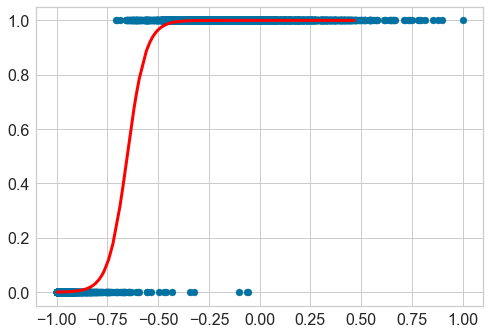

In [43]:
from scipy.special import expit

loss_log = expit(sorted(valori_test.reshape(-1,1)) * clf_log.coef_ + clf_log.intercept_).ravel()
plt.plot(sorted(valori_test.reshape(-1,1)), loss_log, color='red', linewidth=3)
plt.scatter(valori_train, np.ravel(y_train_binary))
#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [44]:
reg_reg = LinearRegression()
reg_reg.fit(valori_train.reshape(-1,1), y_train_binary)

LinearRegression()

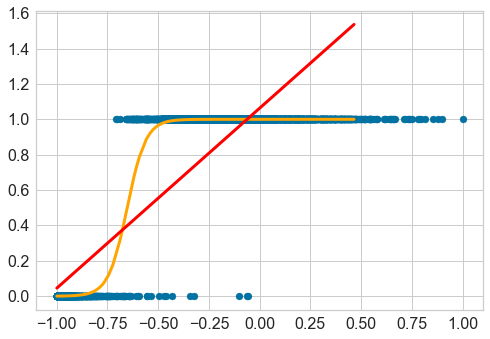

In [45]:
plt.scatter(valori_train.reshape(-1,1), y_train_binary)

loss_log = expit(sorted(valori_test.reshape(-1,1)) * clf_log.coef_ + clf_log.intercept_).ravel()
plt.plot(sorted(valori_test), loss_log, color='orange', linewidth=3)

plt.plot(sorted(valori_test.reshape(-1,1)), reg_reg.coef_ * sorted(valori_test.reshape(-1,1)) + reg_reg.intercept_, color='red', linewidth=3)


#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [48]:
print(confusion_matrix(y_test_binary,y_pred_log,labels=[1,0]))
print("y_test:" ,np.unique(y_test, return_counts=True))
print("y_test_binary:" ,np.unique(y_test_binary, return_counts=True))


[[1387    0]
 [   7 1553]]
y_test: (array([1, 2, 3, 4, 5, 6], dtype=int64), array([496, 471, 420, 491, 532, 537], dtype=int64))
y_test_binary: (array([0, 1]), array([1560, 1387], dtype=int64))


## SVC

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [50]:
model_svc=SVC()
model_svc.fit(X_train,np.ravel(y_train))
prediction_svc=model_svc.predict(X_test)

In [51]:
print(classification_report(y_test,prediction_svc))
print(confusion_matrix(y_test,prediction_svc))

              precision    recall  f1-score   support

           1       0.93      0.98      0.96       496
           2       0.93      0.95      0.94       471
           3       0.99      0.92      0.95       420
           4       0.94      0.89      0.91       491
           5       0.91      0.94      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

[[487   6   3   0   0   0]
 [ 24 447   0   0   0   0]
 [ 10  24 386   0   0   0]
 [  0   2   0 439  50   0]
 [  0   0   0  30 502   0]
 [  0   0   0   0   0 537]]


### GridSearch for hyperparameter tuning

In [52]:
param_grid = {'C':[1, 10, 100, 1000], 'kernel' : ['linear']}

In [53]:
grid= GridSearchCV(SVC(), param_grid, refit=True)

In [54]:
grid.fit(X_train,np.ravel(y_train))

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear']})

In [55]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [56]:
predict_svc_grid=grid.predict(X_test)

In [57]:
print(classification_report(y_test,predict_svc_grid))
print(confusion_matrix(y_test,predict_svc_grid))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
           2       0.98      0.96      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.89      0.92       491
           5       0.91      0.97      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.97      0.96      0.96      2947

[[492   1   3   0   0   0]
 [ 17 452   2   0   0   0]
 [  3   6 411   0   0   0]
 [  0   2   0 435  54   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]


In [58]:
#After GS
clf_SVC = SVC(C=100, gamma=0.01, kernel='rbf')
clf_SVC.fit(X_train, np.ravel(y_train))
clf_SVC = clf_SVC.predict(X_test)

In [59]:
print(classification_report(y_test, clf_SVC))
print('Accuracy %s' % accuracy_score(y_test, clf_SVC))
print('F1-score %s' % f1_score(y_test, clf_SVC,average=None))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
           2       0.94      0.97      0.96       471
           3       0.99      0.94      0.97       420
           4       0.98      0.91      0.94       491
           5       0.92      0.98      0.95       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947

Accuracy 0.9664065151001018
F1-score [0.97507478 0.95597484 0.96703297 0.94391534 0.95359418 1.        ]
